# CRIMS


In [70]:
# Llibreries
# Lybraries

import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import geopandas as gpd

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [71]:
# Carregar les dades
# Load data

df24 = pd.read_csv('CMX_2024.csv', encoding='latin1')

print(df24.columns)

# Eliminar variables innecesaries
# Drop unnecessary variables

df24 = df24.drop(['anio_inicio','mes_inicio','fecha_inicio','hora_inicio', 'anio_hecho'], axis=1)

df24 = df24.drop(['competencia', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_hecho', 'colonia_catalogo',
       'alcaldia_hecho', 'alcaldia_catalogo', 'municipio_hecho', ], axis=1)

df24 = df24[df24['categoria_delito'] != 'HECHO NO DELICTIVO']

display(df24.info())

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'hora_inicio',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'delito',
       'categoria_delito', 'competencia', 'fiscalia', 'agencia',
       'unidad_investigacion', 'colonia_hecho', 'colonia_catalogo',
       'alcaldia_hecho', 'alcaldia_catalogo', 'municipio_hecho', 'latitud',
       'longitud'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 135007 entries, 1 to 138628
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   mes_hecho         134997 non-null  object 
 1   fecha_hecho       134997 non-null  object 
 2   hora_hecho        134662 non-null  object 
 3   delito            135007 non-null  object 
 4   categoria_delito  135007 non-null  object 
 5   latitud           126725 non-null  float64
 6   longitud          126725 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.2+ MB


None

In [72]:
# encoding

df24_BE = df24.copy()

print(df24.info())

# Encoding categorical variables
label_encoder = LabelEncoder()
df24['mes_hecho'] = label_encoder.fit_transform(df24['mes_hecho'])
df24['delito_encoded'] = label_encoder.fit_transform(df24['delito'])
df24['categoria_delito_encoded'] = label_encoder.fit_transform(df24['categoria_delito'])
df24['fecha_hecho'] = label_encoder.fit_transform(df24['fecha_hecho'])


# Convertir a formato timedelta
df24['hora_hecho'] = pd.to_timedelta(df24['hora_hecho'])
# Convertir a segundos
df24['time_seconds'] = df24['hora_hecho'].dt.total_seconds()
# Drop the 'hora_hecho' column
df24 = df24.drop('hora_hecho', axis=1)


print(df24.info())
print(df24_BE.info())

# Delete missings
df24 = df24.dropna()

print(df24.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 135007 entries, 1 to 138628
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   mes_hecho         134997 non-null  object 
 1   fecha_hecho       134997 non-null  object 
 2   hora_hecho        134662 non-null  object 
 3   delito            135007 non-null  object 
 4   categoria_delito  135007 non-null  object 
 5   latitud           126725 non-null  float64
 6   longitud          126725 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
Index: 135007 entries, 1 to 138628
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   mes_hecho                 135007 non-null  int64  
 1   fecha_hecho               135007 non-null  int64  
 2   delito                    135007 non-null  object 
 3   categoria_delito

In [73]:
from sklearn.cluster import KMeans

# Create an instance of the KMeans class
kmeans = KMeans(n_clusters=6)

# Fit the KMeans model to the 'time_seconds' variable
kmeans.fit(df24['time_seconds'].values.reshape(-1, 1))

# Get the cluster labels
cluster_labels = kmeans.labels_

# Assign the cluster labels to the dataframe
df24['time_zones'] = cluster_labels

In [74]:
df24_1 = df24[df24['time_zones'] == 0]
df24_2 = df24[df24['time_zones'] == 1]
df24_3 = df24[df24['time_zones'] == 2]
df24_4 = df24[df24['time_zones'] == 3]
df24_5 = df24[df24['time_zones'] == 4]
df24_6 = df24[df24['time_zones'] == 5]

Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


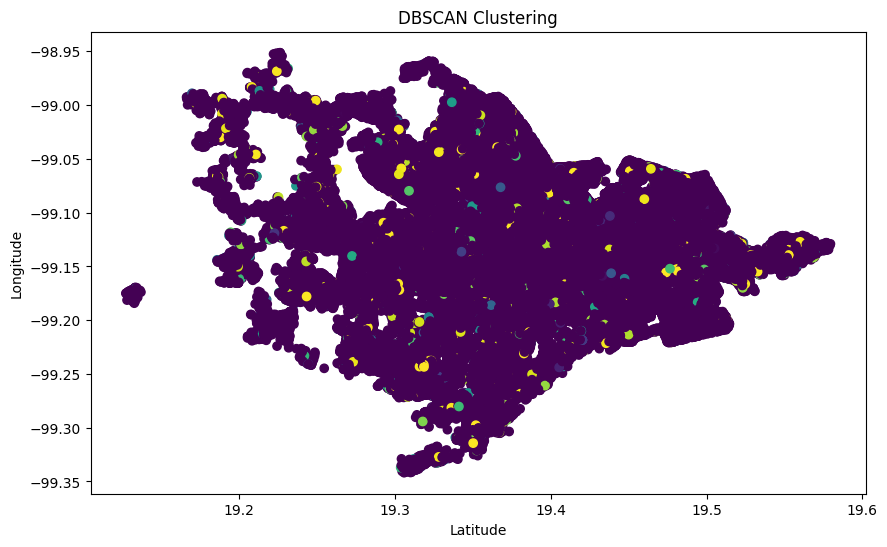

cluster_label
-1       119450
 903         69
 97          25
 16          24
 125         19
          ...  
 523          5
 525          5
 527          5
 530          5
 1072         5
Name: count, Length: 1074, dtype: int64


In [75]:
import pandas as pd
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

def analyze_clusters(df):
    # Apply the DBSCAN algorithm
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    df2 = df.drop(['delito', 'categoria_delito'], axis=1)
    print(df2.columns)
    df['cluster_label'] = dbscan.fit_predict(df2)

    # Plot the clusters
    plt.figure(figsize=(10, 6))
    plt.scatter(df['latitud'], df['longitud'], c=df['cluster_label'], cmap='viridis')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('DBSCAN Clustering')
    plt.show()

    # Count the occurrences of each cluster label
    cluster_counts = df['cluster_label'].value_counts()
    print(cluster_counts)

analyze_clusters(df24)


Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


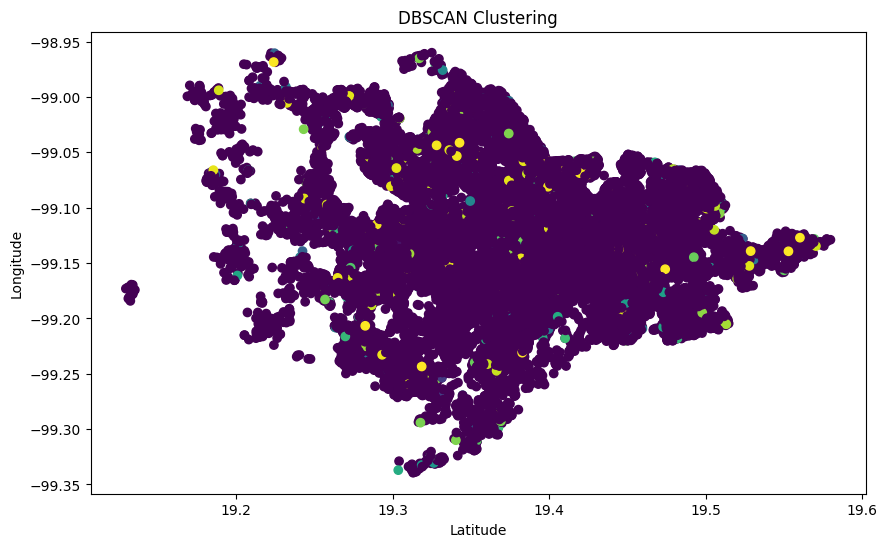

cluster_label
-1      21086
 62        10
 106        9
 71         8
 78         8
        ...  
 51         5
 47         5
 45         5
 43         5
 139        5
Name: count, Length: 141, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 1265 to 138320
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 777 non-null    int64  
 1   fecha_hecho               777 non-null    int64  
 2   delito                    777 non-null    object 
 3   categoria_delito          777 non-null    object 
 4   latitud                   777 non-null    float64
 5   longitud                  777 non-null    float64
 6   delito_encoded            777 non-null    int64  
 7   categoria_delito_encoded  777 non-null    int64  
 8   time_seconds              777 non-null    float64
 9   time_zones                777 non-null    int32  
 10  cluster_label         

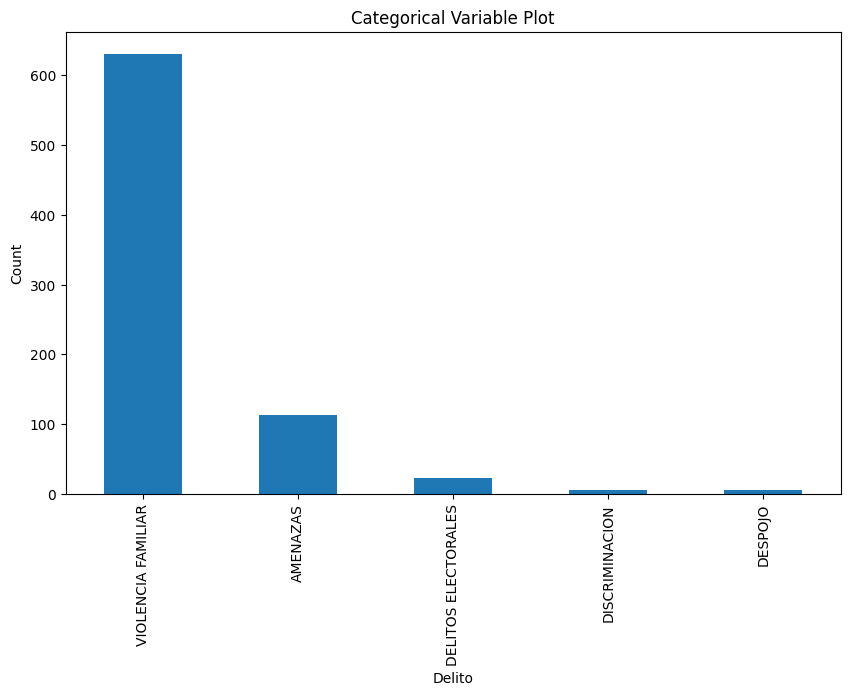

In [76]:
analyze_clusters(df24_1)

cluster_counts = df24_1[['delito', 'cluster_label']]

luster_counts = df24_1.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_1['time_seconds'].describe()

df24_1.to_csv('CMX_mañana.csv', index=False)


Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


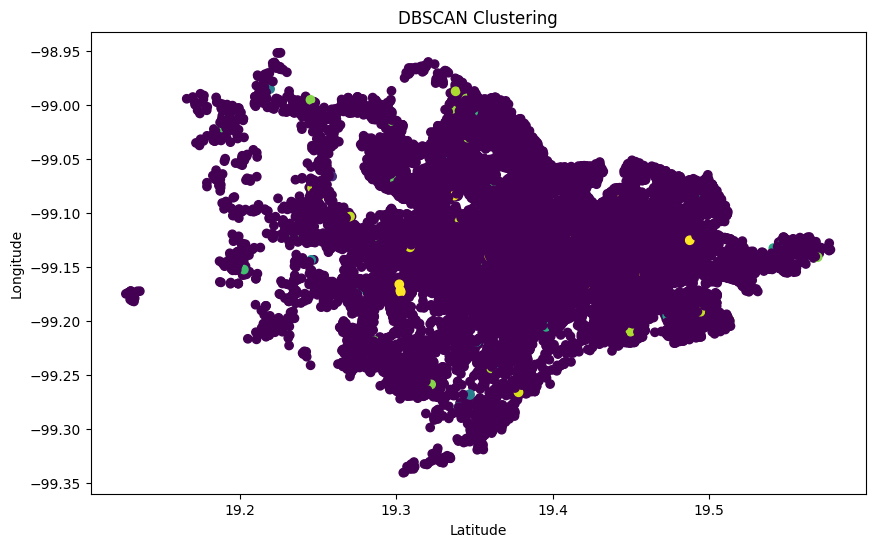

cluster_label
-1     19821
 24        9
 29        8
 13        7
 12        7
 18        7
 20        6
 3         6
 14        6
 22        5
 21        5
 25        5
 23        5
 26        5
 27        5
 28        5
 30        5
 31        5
 19        5
 16        5
 17        5
 0         5
 15        5
 11        5
 10        5
 9         5
 8         5
 7         5
 6         5
 5         5
 4         5
 2         5
 1         5
 32        5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 181 entries, 1210 to 137314
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 181 non-null    int64  
 1   fecha_hecho               181 non-null    int64  
 2   delito                    181 non-null    object 
 3   categoria_delito          181 non-null    object 
 4   latitud                   181 non-null    float64
 5   longitud              

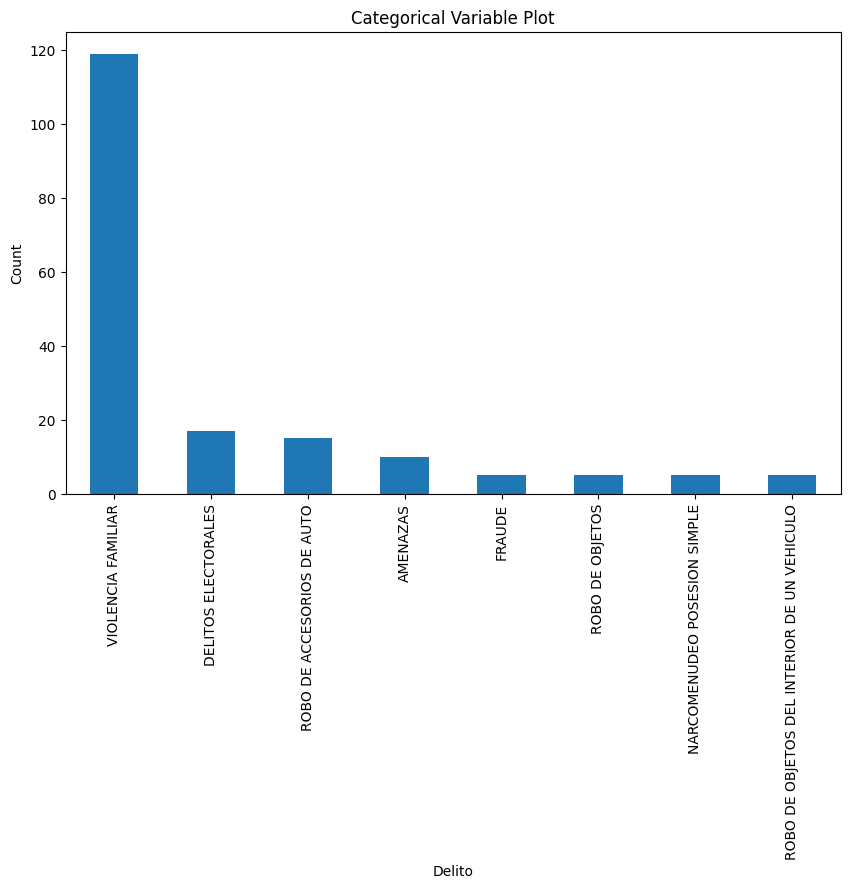

In [77]:
analyze_clusters(df24_2)

cluster_counts = df24_2[['delito', 'cluster_label']]

luster_counts = df24_2.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_2['time_seconds'].describe()

df24_2.to_csv('CMX_noche.csv', index=False)

Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


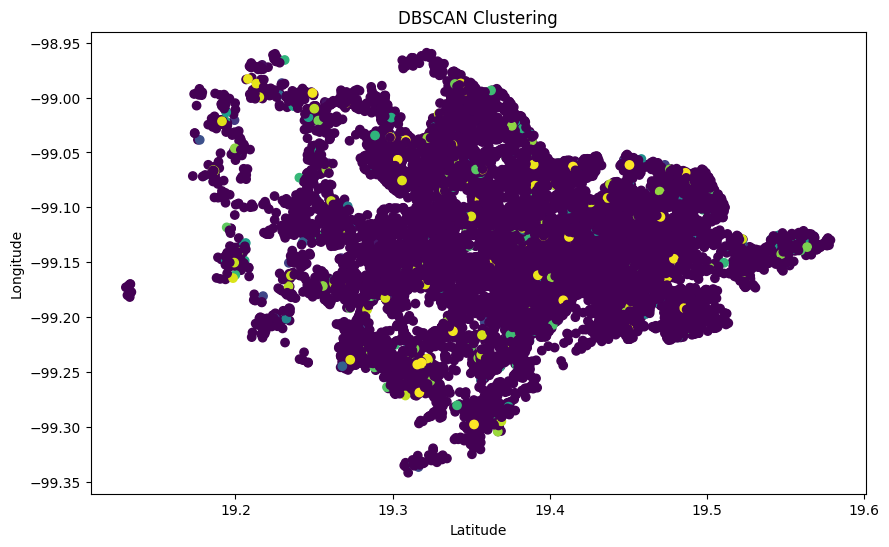

cluster_label
-1      12801
 70         9
 16         9
 15         8
 101        8
        ...  
 25         5
 20         5
 43         5
 75         5
 52         5
Name: count, Length: 107, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 1047 to 138292
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 615 non-null    int64  
 1   fecha_hecho               615 non-null    int64  
 2   delito                    615 non-null    object 
 3   categoria_delito          615 non-null    object 
 4   latitud                   615 non-null    float64
 5   longitud                  615 non-null    float64
 6   delito_encoded            615 non-null    int64  
 7   categoria_delito_encoded  615 non-null    int64  
 8   time_seconds              615 non-null    float64
 9   time_zones                615 non-null    int32  
 10  cluster_label         

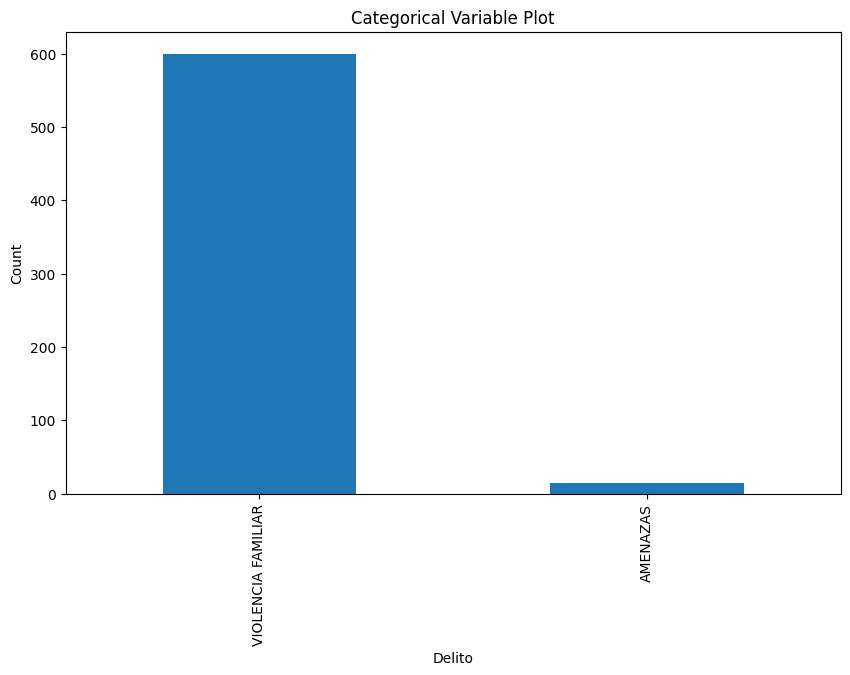

In [78]:
analyze_clusters(df24_3)

cluster_counts = df24_3[['delito', 'cluster_label']]

luster_counts = df24_3.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_3['time_seconds'].describe()

df24_3.to_csv('CMX_madrugada.csv', index=False)

Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


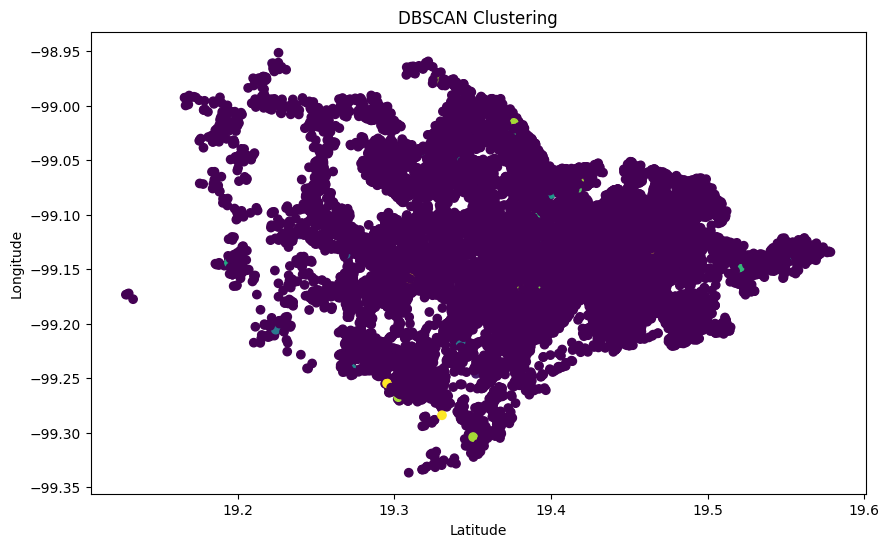

cluster_label
-1     14671
 11       13
 10        8
 12        8
 5         7
 6         6
 0         5
 1         5
 2         5
 3         5
 4         5
 7         5
 8         5
 9         5
 13        5
 14        5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 7131 to 124671
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 92 non-null     int64  
 1   fecha_hecho               92 non-null     int64  
 2   delito                    92 non-null     object 
 3   categoria_delito          92 non-null     object 
 4   latitud                   92 non-null     float64
 5   longitud                  92 non-null     float64
 6   delito_encoded            92 non-null     int64  
 7   categoria_delito_encoded  92 non-null     int64  
 8   time_seconds              92 non-null     float64
 9   time_zones                92 non-null

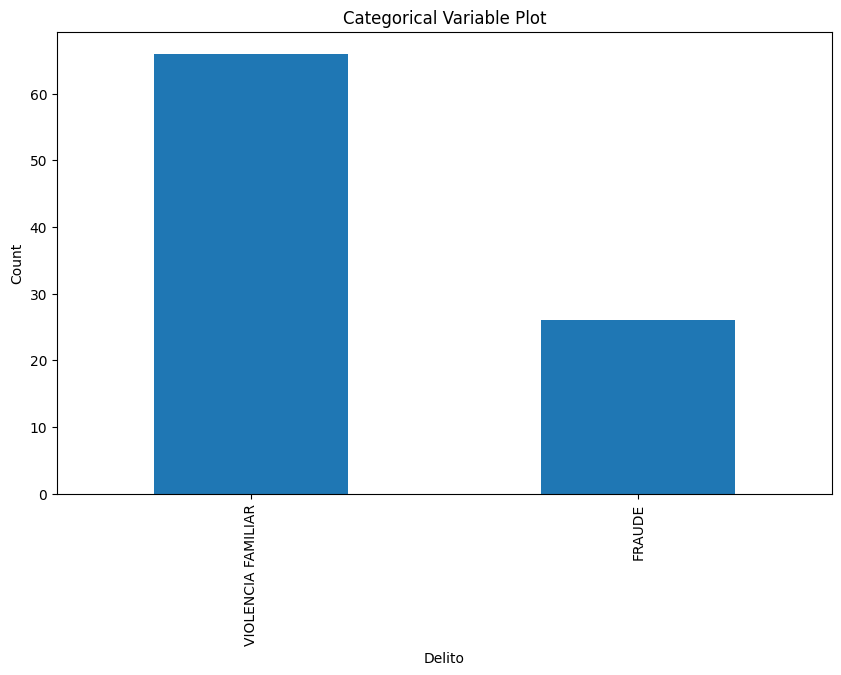

In [79]:
analyze_clusters(df24_4)

cluster_counts = df24_4[['delito', 'cluster_label']]

luster_counts = df24_4.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_4['time_seconds'].describe()

df24_4.to_csv('CMX_mediodia.csv', index=False)

Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


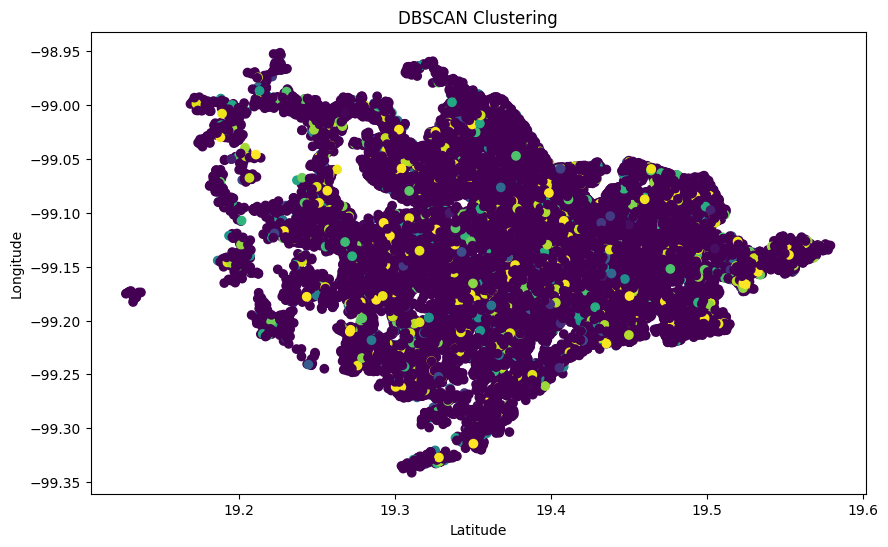

cluster_label
-1      33186
 540       69
 83        25
 16        24
 572       19
        ...  
 164        5
 474        5
 475        5
 476        5
 634        5
Name: count, Length: 636, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 4521 entries, 26 to 138514
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 4521 non-null   int64  
 1   fecha_hecho               4521 non-null   int64  
 2   delito                    4521 non-null   object 
 3   categoria_delito          4521 non-null   object 
 4   latitud                   4521 non-null   float64
 5   longitud                  4521 non-null   float64
 6   delito_encoded            4521 non-null   int64  
 7   categoria_delito_encoded  4521 non-null   int64  
 8   time_seconds              4521 non-null   float64
 9   time_zones                4521 non-null   int32  
 10  cluster_label          

/home/claudia/Documentos/GitHub/GIAenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/claudia/Documentos/GitHub/GIAenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


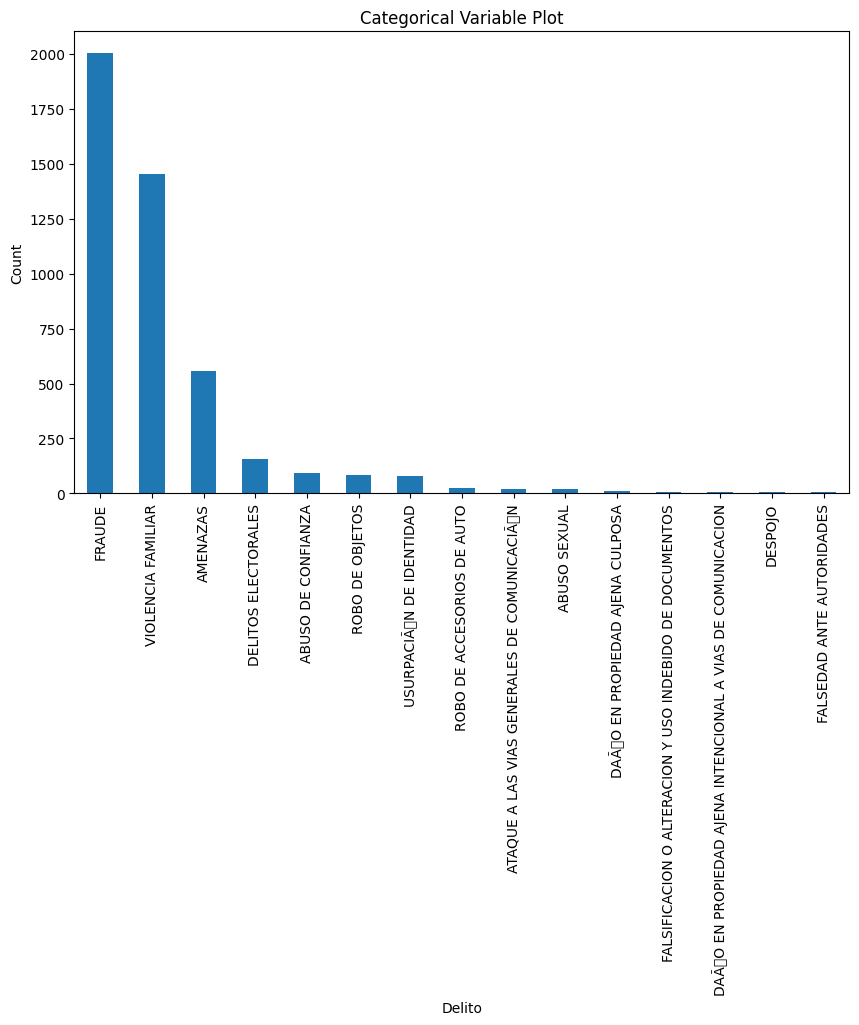

In [80]:
analyze_clusters(df24_5)

cluster_counts = df24_5[['delito', 'cluster_label']]

luster_counts = df24_5.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_5['time_seconds'].describe()

df24_5.to_csv('CMX_tarde.csv', index=False)

Index(['mes_hecho', 'fecha_hecho', 'latitud', 'longitud', 'delito_encoded',
       'categoria_delito_encoded', 'time_seconds', 'time_zones'],
      dtype='object')


/tmp/ipykernel_30325/1012290005.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = dbscan.fit_predict(df2)


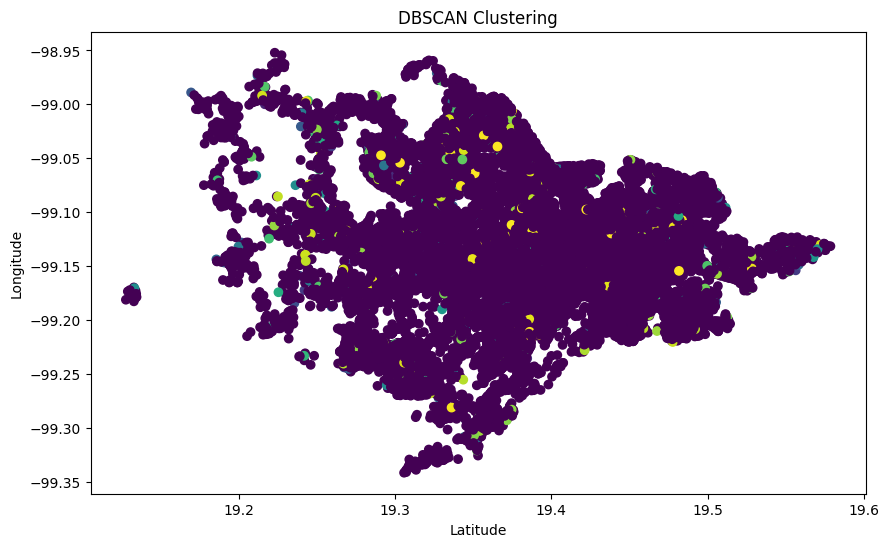

cluster_label
-1      17885
 99        11
 50         9
 2          9
 34         9
        ...  
 48         5
 47         5
 46         5
 43         5
 143        5
Name: count, Length: 145, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 829 entries, 3770 to 137056
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mes_hecho                 829 non-null    int64  
 1   fecha_hecho               829 non-null    int64  
 2   delito                    829 non-null    object 
 3   categoria_delito          829 non-null    object 
 4   latitud                   829 non-null    float64
 5   longitud                  829 non-null    float64
 6   delito_encoded            829 non-null    int64  
 7   categoria_delito_encoded  829 non-null    int64  
 8   time_seconds              829 non-null    float64
 9   time_zones                829 non-null    int32  
 10  cluster_label         

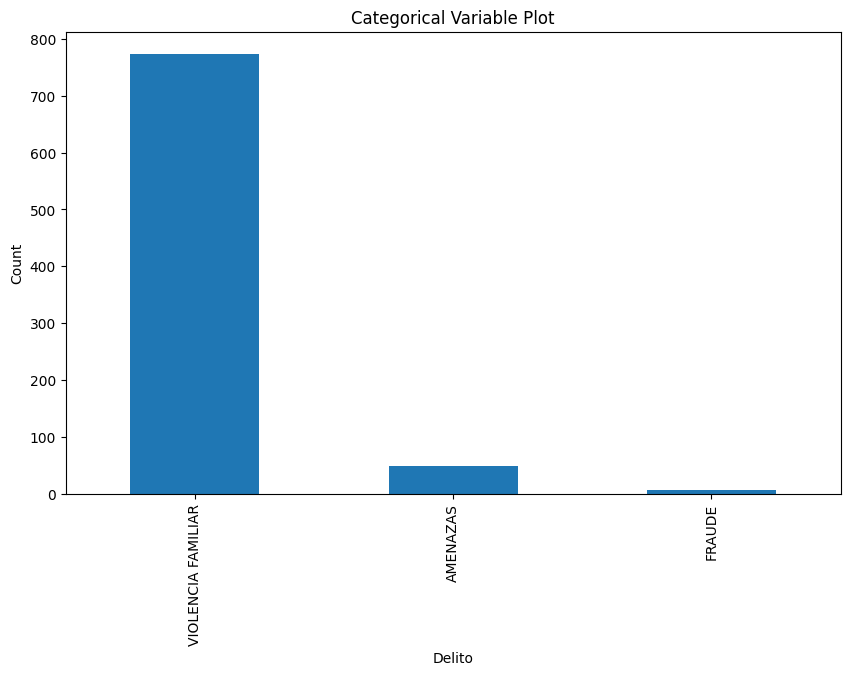

In [81]:
analyze_clusters(df24_6)

cluster_counts = df24_6[['delito', 'cluster_label']]

luster_counts = df24_6.drop(cluster_counts[cluster_counts['cluster_label'] == -1].index)

luster_counts.info()
print(luster_counts.head())

plt.figure(figsize=(10, 6))
luster_counts['delito'].value_counts().plot(kind='bar')
plt.xlabel('Delito')
plt.ylabel('Count')
plt.title('Categorical Variable Plot')
plt.show()

df24_6['time_seconds'].describe()

df24_6.to_csv('CMX_medianoche.csv', index=False)

/home/claudia/Documentos/GitHub/GIAenv/lib/python3.10/site-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


<Axes: >

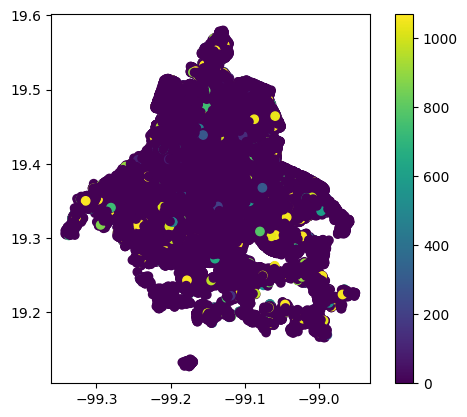

In [82]:
import geopandas as gpd

# Create a GeoDataFrame from the DataFrame with cluster labels
gdf_cluster = gpd.GeoDataFrame(df24, geometry=gpd.points_from_xy(df24['longitud'], df24['latitud']))

# Save the GeoDataFrame as a GeoJSON file
gdf_cluster.to_file('cluster_data.geojson', driver='GeoJSON')

# Plot the GeoDataFrame on a map with different colors for each cluster
gdf_cluster.plot(column='cluster_label', legend=True)

In [84]:
print(df24_1['time_seconds'].max())
print(df24_2['time_seconds'].max())
print(df24_3['time_seconds'].max())
print(df24_4['time_seconds'].max())
print(df24_5['time_seconds'].max())
print(df24_6['time_seconds'].max())

61620.0
34800.0
86340.0
18360.0
48180.0
73860.0
